# SMS Spam Collection Dataset

https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [1]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

data_dir = "../input/"
df = pd.read_csv(data_dir + '/spam.csv', encoding='latin-1')  


In [2]:
from sklearn.model_selection import train_test_split

# split into train and test
data_train, data_test, labels_train, labels_test = train_test_split(
    df.v2,
    df.v1, 
    test_size=0.2, 
    random_state=0) 

print (data_train.head())
print (labels_train.head())

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... ÌÏ v ma fan...
3320                               Yo im right by yo work
Name: v2, dtype: object
1114    ham
3589    ham
3095    ham
1012    ham
3320    ham
Name: v1, dtype: object


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
data_train_count = vectorizer.fit_transform(data_train)
data_test_count  = vectorizer.transform(data_test)

data_train_count.shape
vectorizer.vocabulary_
data_test_count.shape
data_train_count


<4457x7612 sparse matrix of type '<class 'numpy.int64'>'
	with 58826 stored elements in Compressed Sparse Row format>

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
vect = CountVectorizer()
example = ['I love you, good bad bad', 'you are soo good']

result = vect.fit_transform(example)
result1 = vect.transform(example)

print(result1)
print (vect.vocabulary_)
print(result)

  (0, 1)	2
  (0, 2)	1
  (0, 3)	1
  (0, 5)	1
  (1, 0)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
{'love': 3, 'you': 5, 'good': 2, 'bad': 1, 'are': 0, 'soo': 4}
  (0, 1)	2
  (0, 2)	1
  (0, 5)	1
  (0, 3)	1
  (1, 4)	1
  (1, 0)	1
  (1, 2)	1
  (1, 5)	1


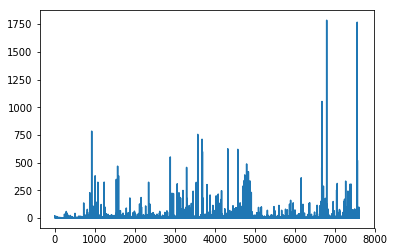

,occurrences,term,frequency
6799,1785,to,0.027950
7562,1767,you,0.027668
6681,1052,the,0.016472
923,784,and,0.012276
3575,755,in,0.011822


In [5]:

word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':data_train_count.toarray().sum(axis=0)})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
plt.plot(word_freq_df.occurrences)
plt.show()

word_freq_df_sort = word_freq_df.sort_values(by=['occurrences'], ascending=False)
word_freq_df_sort.head()



In [9]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(data_train_count, labels_train)
predictions = clf.predict(data_test_count)
print(predictions)
print (accuracy_score(labels_test, predictions))

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
0.9874439461883409
